In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from DMS_free_virus_logFC import read_wiggle
import os; print(os.getcwd())
from Bio import SeqIO
from Bio.SeqUtils import GC
from scipy.stats import pearsonr

e:\bigger data\master_20\scripts\DMS


In [4]:
# test
df, header = read_wiggle("data/aligned/DMS_footprint/AdWT_free_DMS_1_footprint.wig")
df.head()

,pos,score
0,1,1.21651
1,2,2.43302
2,3,1.21651
3,4,0.00000
4,5,0.00000


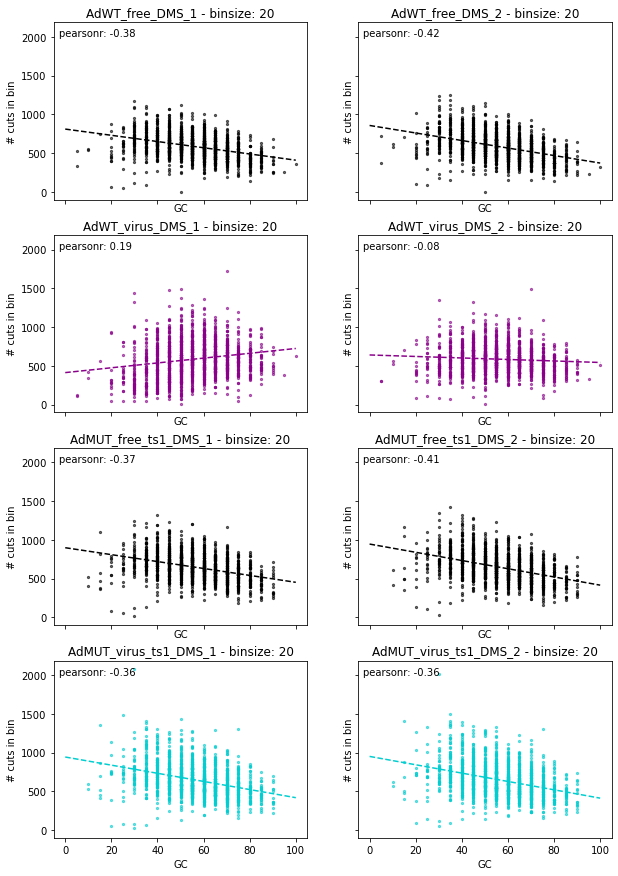

In [5]:
#################
#### plot GC ####
#################

bin_size = 20
palette ={"virus_wt":"darkmagenta","free":"black", "virus_ts1":"darkturquoise"}
samples = ["AdWT_free_DMS_1",
          "AdWT_free_DMS_2",
          "AdWT_virus_DMS_1",
          "AdWT_virus_DMS_2",
          "AdMUT_free_ts1_DMS_1",
          "AdMUT_free_ts1_DMS_2",
          "AdMUT_virus_ts1_DMS_1",
          "AdMUT_virus_ts1_DMS_2"]


f, axes = plt.subplots(4, 2, figsize=(10, 15), sharex = True, sharey = True)


row = 0
line = 0
for sample in samples:
    
    df, header = read_wiggle("data/aligned/DMS_footprint/" + sample + "_footprint.wig")
    
    # bin the footprint
    score_bins = df.groupby(df.index // bin_size).sum()["score"]
    bins_bins = df.groupby(df.index // bin_size).max()["pos"]
    
    # load CORRECT genome
    if "ts1" in sample:
        genome = SeqIO.read("sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
    else:
        genome = SeqIO.read("sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq

    # get the GC for every bin
    GC_bins = []
    start = 0
    for end in bins_bins:
        GC_bins.append(GC(genome[start:end]))
        start = end
    
    # finalize df
    GC_footprint = pd.DataFrame({"score" : score_bins, "GC" : GC_bins})
    
    # set color
    if "virus_ts1" in sample:
        color = palette["virus_ts1"]
    elif "virus_DMS" in sample:
        color = palette["virus_wt"]
    else:
        color = palette["free"]
        
    # plot
    axes[line, row].scatter(x = GC_footprint["GC"], y = GC_footprint["score"], c=color, s=5, alpha = 0.6)
    axes[line, row].set_title(sample + " - binsize: " + str(bin_size))
    axes[line,row].set_xlabel("GC")
    axes[line,row].set_ylabel("# cuts in bin")
    
    # regression
    m, b = np.polyfit(GC_footprint["GC"], GC_footprint["score"], 1)
    x = np.linspace(0,100,100)
    y = m*x+b
    axes[line, row].plot(x, y, ls = "--", c = color, linewidth = 1.5)
    
    # correlation
    r, p = pearsonr(x = GC_footprint["GC"], y = GC_footprint["score"])
    axes[line, row].text(0.02, 0.92, "pearsonr: " + str(round(r,2)), transform = axes[line, row].transAxes)
    
    # counters for the subplots
    row += 1
    if row == 2:
        line += 1
        row = 0
plt.show()
plt.close()

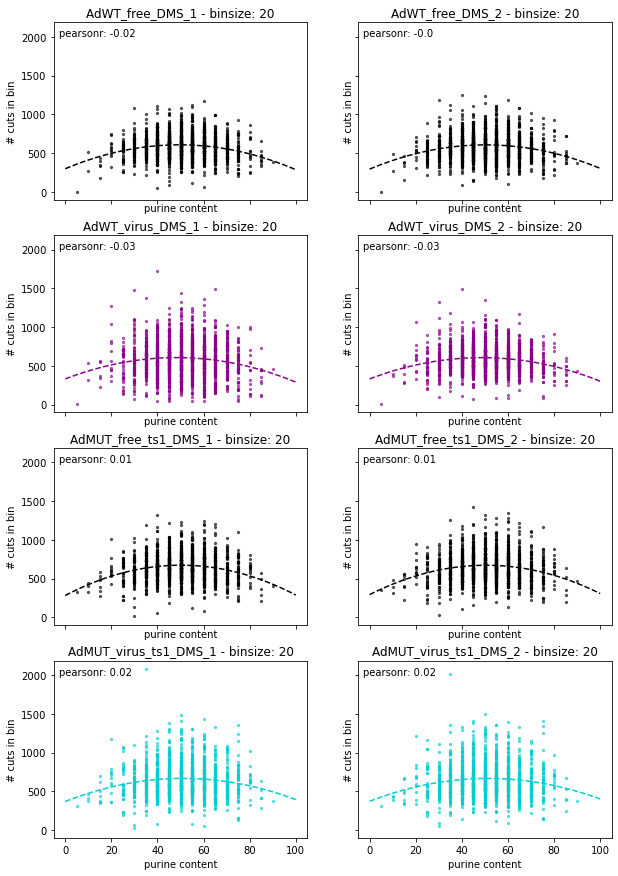

In [6]:
###########################
#### plot AG (purines) ####
###########################

bin_size = 20
palette ={"virus_wt":"darkmagenta","free":"black", "virus_ts1":"darkturquoise"}
samples = ["AdWT_free_DMS_1",
          "AdWT_free_DMS_2",
          "AdWT_virus_DMS_1",
          "AdWT_virus_DMS_2",
          "AdMUT_free_ts1_DMS_1",
          "AdMUT_free_ts1_DMS_2",
          "AdMUT_virus_ts1_DMS_1",
          "AdMUT_virus_ts1_DMS_2"]


f, axes = plt.subplots(4, 2, figsize=(10, 15), sharex = True, sharey = True)


row = 0
line = 0
for sample in samples:
    
    df, header = read_wiggle("data/aligned/DMS_footprint/" + sample + "_footprint.wig")
    
    # bin the footprint
    score_bins = df.groupby(df.index // bin_size).sum()["score"]
    bins_bins = df.groupby(df.index // bin_size).max()["pos"]
    
    # load CORRECT genome
    if "ts1" in sample:
        genome = SeqIO.read("sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
    else:
        genome = SeqIO.read("sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq

    # get the AG for every bin
    AG_bins = []
    start = 0
    for end in bins_bins:
        AG_perc = (genome[start:end].count("A") + genome[start:end].count("G")) / bin_size
        AG_bins.append(AG_perc*100)
        start = end
    
    # finalize df
    AG_footprint = pd.DataFrame({"score" : score_bins, "AG" : AG_bins})
    
    # set color
    if "virus_ts1" in sample:
        color = palette["virus_ts1"]
    elif "virus_DMS" in sample:
        color = palette["virus_wt"]
    else:
        color = palette["free"]
        
    # plot
    axes[line, row].scatter(x = AG_footprint["AG"], y = AG_footprint["score"], c=color, s=5, alpha = 0.6)
    axes[line, row].set_title(sample + " - binsize: " + str(bin_size))
    axes[line,row].set_xlabel("purine content")
    axes[line,row].set_ylabel("# cuts in bin")
    
    # regression
    a, b, c = np.polyfit(AG_footprint["AG"], AG_footprint["score"], 2)
    x = np.linspace(0,100,100)
    y = a*x**2 + b*x + c
    axes[line, row].plot(x, y, ls = "--", c = color, linewidth = 1.5)
    
    # correlation
    r, p = pearsonr(x = AG_footprint["AG"], y = AG_footprint["score"])
    axes[line, row].text(0.02, 0.92, "pearsonr: " + str(round(r,2)), transform = axes[line, row].transAxes)
    
    # counters for the subplots
    row += 1
    if row == 2:
        line += 1
        row = 0
plt.show()
plt.close()

In [7]:
## free DNA background:

free_samples = {"wt" : ["AdWT_free_DMS_1", "AdWT_free_DMS_2"],
               "ts1" : ["AdMUT_free_ts1_DMS_1", "AdMUT_free_ts1_DMS_2"]}

free_bg = {}

for genotype in free_samples:
    if "ts1" in genotype:
        genome = SeqIO.read("sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
    else:
        genome = SeqIO.read("sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq
        
    master_df = pd.DataFrame(columns = ["pos"])
    master_df["pos"] = list(range(1, len(genome)+1))
    for sample in free_samples[genotype]:
        df, header = read_wiggle("data/aligned/DMS_footprint/" + sample + "_footprint.wig")
        master_df[sample] = df["score"]
    
    col = master_df.loc[: , free_samples[genotype][0]:free_samples[genotype][-1]]
    master_df["avg"] = col.mean(axis=1)
    
    free_bg[genotype] = master_df[["pos", "avg"]]

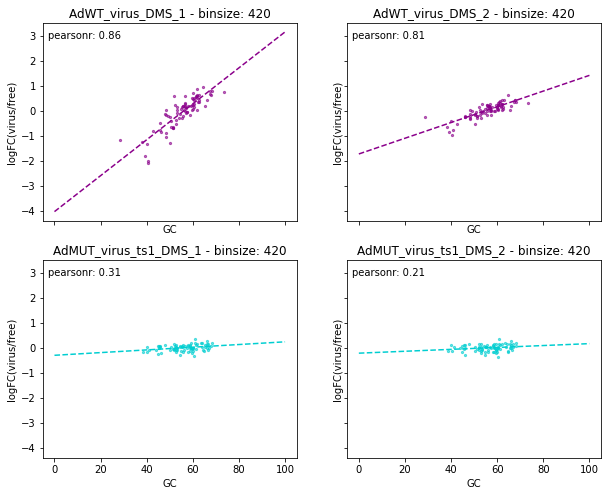

In [8]:
###########################
#### logFC ####
###########################

bin_size = 420
palette ={"virus_wt":"darkmagenta","free":"black", "virus_ts1":"darkturquoise"}
samples = ["AdWT_virus_DMS_1",
          "AdWT_virus_DMS_2",
          "AdMUT_virus_ts1_DMS_1",
          "AdMUT_virus_ts1_DMS_2"]


f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex = True, sharey = True)


row = 0
line = 0
for sample in samples:
    
    df, header = read_wiggle("data/aligned/DMS_footprint/" + sample + "_footprint.wig")
    
    # load genome and background
    if "ts1" in sample:
        bg = free_bg["ts1"]
        genome = SeqIO.read("sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
    else:
        bg = free_bg["wt"]
        genome = SeqIO.read("sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq
    
    
    master_df = pd.DataFrame({"pos" : df["pos"], "score": df["score"], "background": bg["avg"]})
    
    # bin the logFC
    bg_bins = master_df.groupby(df.index // bin_size).sum()["background"]
    score_bins = master_df.groupby(df.index // bin_size).sum()["score"]
    bins_bins = master_df.groupby(df.index // bin_size).max()["pos"]
    
    # get the GC for every bin
    GC_bins = []
    start = 0
    for end in bins_bins:
        GC_bins.append(GC(genome[start:end]))
        start = end
    
    # finalize df
    GC_footprint = pd.DataFrame({"score" : score_bins, "background": bg_bins, "GC" : GC_bins})
    
    # logFC with pseudocount of 10**-6
    GC_footprint["logFC"] = np.log2((GC_footprint["score"]+10**-6)/(GC_footprint["background"]+10**-6))
    
    
    # set color
    if "virus_ts1" in sample:
        color = palette["virus_ts1"]
    elif "virus_DMS" in sample:
        color = palette["virus_wt"]
    else:
        color = palette["free"]
        
    # plot
    axes[line, row].scatter(x = GC_footprint["GC"], y = GC_footprint["logFC"], c=color, s=5, alpha = 0.6)
    axes[line, row].set_title(sample + " - binsize: " + str(bin_size))
    axes[line,row].set_xlabel("GC")
    axes[line,row].set_ylabel("logFC(virus/free)")
    
    # regression
    a, b = np.polyfit(GC_footprint["GC"], GC_footprint["logFC"], 1)
    x = np.linspace(0,100,100)
    y = a*x + b
    axes[line, row].plot(x, y, ls = "--", c = color, linewidth = 1.5)
    
    # correlation
    r, p = pearsonr(x = GC_footprint["GC"], y = GC_footprint["logFC"])
    axes[line, row].text(0.02, 0.92, "pearsonr: " + str(round(r,2)), transform = axes[line, row].transAxes)
    
    # counters for the subplots
    row += 1
    if row == 2:
        line += 1
        row = 0
plt.show()
plt.close()   

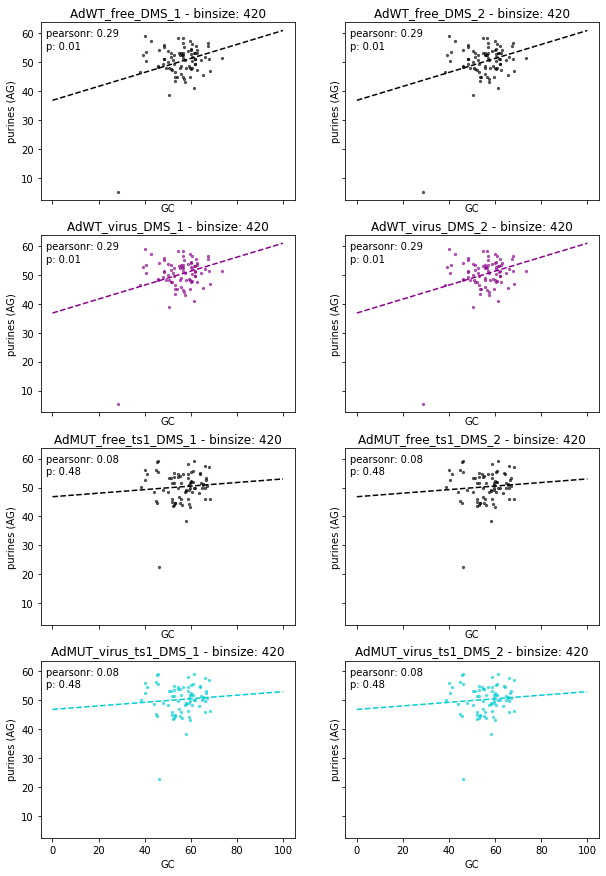

In [9]:
### correlate GC and AG content ###
###################################

bin_size = 420
palette ={"virus_wt":"darkmagenta","free":"black", "virus_ts1":"darkturquoise"}
samples = ["AdWT_free_DMS_1",
          "AdWT_free_DMS_2",
          "AdWT_virus_DMS_1",
          "AdWT_virus_DMS_2",
          "AdMUT_free_ts1_DMS_1",
          "AdMUT_free_ts1_DMS_2",
          "AdMUT_virus_ts1_DMS_1",
          "AdMUT_virus_ts1_DMS_2"]


f, axes = plt.subplots(4, 2, figsize=(10, 15), sharex = True, sharey = True)


row = 0
line = 0
for sample in samples:
    
    df, header = read_wiggle("data/aligned/DMS_footprint/" + sample + "_footprint.wig")
    
    # bin the footprint
    score_bins = df.groupby(df.index // bin_size).sum()["score"]
    bins_bins = df.groupby(df.index // bin_size).max()["pos"]
    
    # load CORRECT genome
    if "ts1" in sample:
        genome = SeqIO.read("sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
    else:
        genome = SeqIO.read("sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq

    # get the AG for every bin
    AG_bins = []
    GC_bins = []
    start = 0
    for end in bins_bins:
        AG_perc = (genome[start:end].count("A") + genome[start:end].count("G")) / bin_size
        AG_bins.append(AG_perc*100)
        GC_bins.append(GC(genome[start:end]))
        start = end
    
    # finalize df
    AG_footprint = pd.DataFrame({"score" : score_bins, "AG" : AG_bins, "GC" : GC_bins})
    
    # set color
    if "virus_ts1" in sample:
        color = palette["virus_ts1"]
    elif "virus_DMS" in sample:
        color = palette["virus_wt"]
    else:
        color = palette["free"]
        
    # plot
    axes[line, row].scatter(x = AG_footprint["GC"], y = AG_footprint["AG"], c=color, s=5, alpha = 0.6)
    axes[line, row].set_title(sample + " - binsize: " + str(bin_size))
    axes[line,row].set_xlabel("GC")
    axes[line,row].set_ylabel("purines (AG)")
    
    # regression
    a, b = np.polyfit(AG_footprint["GC"], AG_footprint["AG"], 1)
    x = np.linspace(0,100,100)
    y = a*x + b
    axes[line, row].plot(x, y, ls = "--", c = color, linewidth = 1.5)
    
    # correlation
    r, p = pearsonr(x = AG_footprint["GC"], y = AG_footprint["AG"])
    axes[line, row].text(0.02, 0.92, "pearsonr: " + str(round(r,2)), transform = axes[line, row].transAxes)
    axes[line, row].text(0.02, 0.85, "p: " + str(round(p,2)), transform = axes[line, row].transAxes)
    
    # counters for the subplots
    row += 1
    if row == 2:
        line += 1
        row = 0
plt.show()
plt.close()

In [13]:
samples = ["AdWT_free_DMS_1",
          "AdWT_free_DMS_2",
          "AdWT_virus_DMS_1",
          "AdWT_virus_DMS_2",
          "AdMUT_virus_ts1_DMS_1",
          "AdMUT_virus_ts1_DMS_2"]

bin_size = 400

master_df = pd.DataFrame()
for sample in samples:
    
    df, header = read_wiggle("../../data/aligned/DMS_footprint/" + sample + "_footprint.wig")
    
    # bin the footprint
    score_bins = df.groupby(df.index // bin_size).sum()["score"]
    bins_bins = df.groupby(df.index // bin_size).max()["pos"]
    
    # load CORRECT genome
    if "ts1" in sample:
        genome = SeqIO.read("../../sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
        genotype = "ts1"
    elif "free" in sample:
        genome = SeqIO.read("../../sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq
        genotype = "free"
    else:
        genome = SeqIO.read("../../sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq
        genotype = "WT"
        
    df["sample"] = sample
    df["genotype"] = genotype
    # get the GC for every bin
    GC_bins = []
    start = 0
    for end in bins_bins:
        GC_bins.append(GC(genome[start:end]))
        start = end
    
    # finalize df
    GC_footprint = pd.DataFrame({"score" : score_bins, "GC" : GC_bins})
    GC_footprint["sample"] = sample
    GC_footprint["genotype"] = genotype
    
    
    master_df = master_df.append(GC_footprint)
master_df.head()

,score,GC,sample,genotype
0,10612.83453,48.00,AdWT_free_DMS_1,free
1,12638.32404,50.25,AdWT_free_DMS_1,free
2,11985.05769,51.50,AdWT_free_DMS_1,free
3,13129.79452,52.50,AdWT_free_DMS_1,free
4,14128.54807,45.75,AdWT_free_DMS_1,free


In [12]:
palette = {"free":"black", "ts1":"deepskyblue", "WT":"darkmagenta"}

free (-0.5712301705338111, 2.77741723940069e-16)
WT (0.5324066364948041, 5.6139419672288725e-14)
ts1 (-0.6635232211871992, 3.774964382894623e-21)


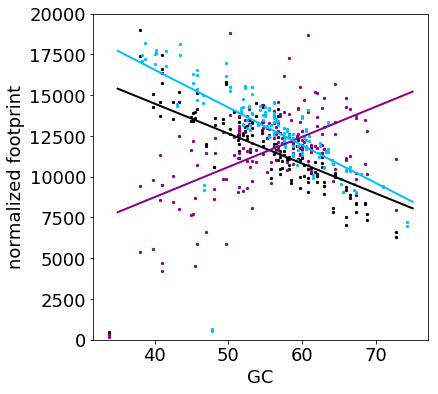

In [43]:
plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(figsize=(6,6))

for genotype in master_df.genotype.unique():
    
    temp_df = master_df.loc[master_df["genotype"]==genotype,]
    
    color = palette[genotype]
    
    ax.scatter(x = temp_df.GC, y=temp_df.score, color = color, s=5)
    
    a, b = np.polyfit(temp_df.GC, temp_df.score, 1)
    x = np.linspace(35,75,100)
    y = a*x + b
    
    print(genotype, pearsonr(temp_df.GC, temp_df.score))
    
    plt.plot(x, y, ls = "-", linewidth = 2, color=color)
    
    plt.ylim(0, 20000)
    
    plt.xlabel("GC")
    plt.ylabel("normalized footprint")
    
    plt.savefig("../../plots/DMS/dms_bias/correlation_footprint_GC.pdf", dpi=300, bbox_inches="tight")
    plt.savefig("../../plots/DMS/dms_bias/correlation_footprint_GC.svg", dpi=300, bbox_inches="tight")

# logFC

In [47]:
samples = [
    "AdWT_virus_DMS_1",
    "AdWT_virus_DMS_2",
    "AdMUT_virus_ts1_DMS_1",
    "AdMUT_virus_ts1_DMS_2"
]

bin_size = 400

master_df = pd.DataFrame()
for sample in samples:
    
    df, header = read_wiggle("../../data/aligned/DMS_footprint/logFC/" + sample + "_logFC.wig")
    
    # bin the footprint
    score_bins = df.groupby(df.index // bin_size).mean()["score"]
    bins_bins = df.groupby(df.index // bin_size).max()["pos"]
    
    # load CORRECT genome
    if "ts1" in sample:
        genome = SeqIO.read("../../sequences/Ad_ts1/AdVir_ts1.fa", "fasta").seq
        genotype = "ts1"
    else:
        genome = SeqIO.read("../../sequences/Ad_E3del_seq/AdVir_del.fa", "fasta").seq
        genotype = "WT"
        
    df["sample"] = sample
    df["genotype"] = genotype
    # get the GC for every bin
    GC_bins = []
    start = 0
    for end in bins_bins:
        GC_bins.append(GC(genome[start:end]))
        start = end
    
    # finalize df
    GC_footprint = pd.DataFrame({"score" : score_bins, "GC" : GC_bins})
    GC_footprint["sample"] = sample
    GC_footprint["genotype"] = genotype
    
    
    master_df = master_df.append(GC_footprint)
master_df.head()

,score,GC,sample,genotype
0,-0.379858,48.00,AdWT_virus_DMS_1,WT
1,0.528175,50.25,AdWT_virus_DMS_1,WT
2,0.011835,51.50,AdWT_virus_DMS_1,WT
3,-0.663045,52.50,AdWT_virus_DMS_1,WT
4,-1.428300,45.75,AdWT_virus_DMS_1,WT


WT (0.7645785606352464, 2.9667038231317704e-34)
ts1 (0.17733418389635747, 0.0267825047874707)


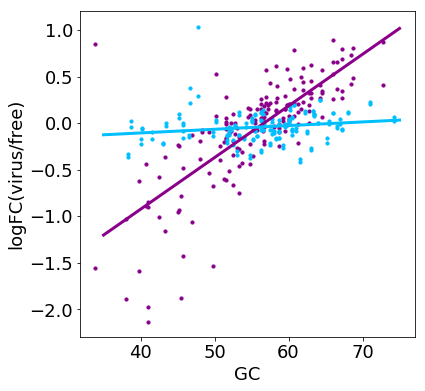

In [51]:
plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(figsize=(6,6))

for genotype in master_df.genotype.unique():
    
    temp_df = master_df.loc[master_df["genotype"]==genotype,]
    
    color = palette[genotype]
    
    ax.scatter(x = temp_df.GC, y=temp_df.score, color = color, s=10)
    
    a, b = np.polyfit(temp_df.GC, temp_df.score, 1)
    x = np.linspace(35,75,100)
    y = a*x + b
    
    print(genotype, pearsonr(temp_df.GC, temp_df.score))
    
    plt.plot(x, y, ls = "-", linewidth = 3, color=color)
    
    plt.xlabel("GC")
    plt.ylabel("logFC(virus/free)")
    
    plt.savefig("../../plots/DMS/dms_bias/correlation_logFC_GC.pdf", dpi=300, bbox_inches="tight")
    plt.savefig("../../plots/DMS/dms_bias/correlation_logFC_GC.svg", dpi=300, bbox_inches="tight")